In [ ]:
import nltk               
import spacy              
import gensim             
import sklearn            
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/feature_dataset_8692.csv')

In [ ]:
dataset1 = pd.read_csv('/content/final_dataset_appendedEverything.csv')

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.2         8692 non-null   int64  
 1   Unnamed: 0.1         8692 non-null   int64  
 2   level_0              8692 non-null   int64  
 3   index                8692 non-null   int64  
 4   Unnamed: 0           8692 non-null   int64  
 5   post                 8692 non-null   object 
 6   Mach                 8692 non-null   int64  
 7   LSRP12               8692 non-null   float64
 8   LSRP2                8692 non-null   float64
 9   NRSM                 8692 non-null   int64  
 10  Person               8692 non-null   int64  
 11  dark_triad           8692 non-null   object 
 12  eng_usage_ratio      8692 non-null   float64
 13  bng_usage_ratio      8692 non-null   float64
 14  eng_switching_ratio  8692 non-null   float64
 15  bng_switching_ratio  8692 non-null   f

In [ ]:
dataset.head()

,Unnamed: 0,Mach,LSRP12,LSRP2,NRSM,english_text,topic_distributions,polarity,subjectivity,flesch_reading_ease,...,WDT,NNPS,RP,SYM,RBR,EX,UH,FW,RBS,WP$
0,0,68.0,1.3,2.5,3.0,my heart my soul..T-T,"[(0, 0.03334016), (1, 0.033336256), (2, 0.0333...",0.0,0.0,118.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,68.0,1.3,2.5,3.0,Free speech is a joke in this country,"[(0, 0.41998866), (1, 0.020005966), (2, 0.0200...",0.4,0.8,105.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,68.0,1.3,2.5,3.0,Make 500 sequels I don't care.Make another Jus...,"[(0, 0.01252973), (1, 0.01252973), (2, 0.01253...",-0.2,0.4,62.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,68.0,1.3,2.5,3.0,Everybody wants a piece of the politically cor...,"[(0, 0.014307692), (1, 0.15719113), (2, 0.0143...",0.1,0.1,45.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,68.0,1.3,2.5,3.0,And that's how a movement dies.,"[(0, 0.033388544), (1, 0.033388544), (2, 0.033...",0.0,0.0,99.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset['eng_usage_ratio'] = dataset1['eng_usage_ratio']

In [ ]:
dataset['bng_usage_ratio'] = dataset1['bng_usage_ratio']

In [ ]:
dataset['eng_switching_ratio'] = dataset1['eng_switching_ratio']

In [ ]:
dataset['bng_switching_ratio'] = dataset1['bng_switching_ratio']

In [ ]:
dataset.head()

,Unnamed: 0,Mach,LSRP12,LSRP2,NRSM,english_text,topic_distributions,polarity,subjectivity,flesch_reading_ease,...,RBR,EX,UH,FW,RBS,WP$,eng_usage_ratio,bng_usage_ratio,eng_switching_ratio,bng_switching_ratio
0,0,68.0,1.3,2.5,3.0,my heart my soul..T-T,"[(0, 0.03334016), (1, 0.033336256), (2, 0.0333...",0.0,0.0,118.18,...,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
1,1,68.0,1.3,2.5,3.0,Free speech is a joke in this country,"[(0, 0.41998866), (1, 0.020005966), (2, 0.0200...",0.4,0.8,105.66,...,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
2,2,68.0,1.3,2.5,3.0,Make 500 sequels I don't care.Make another Jus...,"[(0, 0.01252973), (1, 0.01252973), (2, 0.01253...",-0.2,0.4,62.85,...,0.0,0.0,0.0,0.0,0.0,0.0,76.470588,17.647059,66.666667,33.333333
3,3,68.0,1.3,2.5,3.0,Everybody wants a piece of the politically cor...,"[(0, 0.014307692), (1, 0.15719113), (2, 0.0143...",0.1,0.1,45.42,...,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
4,4,68.0,1.3,2.5,3.0,And that's how a movement dies.,"[(0, 0.033388544), (1, 0.033388544), (2, 0.033...",0.0,0.0,99.23,...,0.0,0.0,0.0,0.0,0.0,0.0,83.333333,16.666667,50.000000,50.000000


In [ ]:
dataset.to_csv('df.csv')

In [ ]:
pd.read_csv('/content/df.csv')

,Unnamed: 0.1,Unnamed: 0,Mach,LSRP12,LSRP2,NRSM,english_text,topic_distributions,polarity,subjectivity,...,RBR,EX,UH,FW,RBS,WP$,eng_usage_ratio,bng_usage_ratio,eng_switching_ratio,bng_switching_ratio
0,0,0,68.0,1.3,2.5,3.0,my heart my soul..T-T,"[(0, 0.03334016), (1, 0.033336256), (2, 0.0333...",0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
1,1,1,68.0,1.3,2.5,3.0,Free speech is a joke in this country,"[(0, 0.41998866), (1, 0.020005966), (2, 0.0200...",0.40,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
2,2,2,68.0,1.3,2.5,3.0,Make 500 sequels I don't care.Make another Jus...,"[(0, 0.01252973), (1, 0.01252973), (2, 0.01253...",-0.20,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,76.470588,17.647059,66.666667,33.333333
3,3,3,68.0,1.3,2.5,3.0,Everybody wants a piece of the politically cor...,"[(0, 0.014307692), (1, 0.15719113), (2, 0.0143...",0.10,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
4,4,4,68.0,1.3,2.5,3.0,And that's how a movement dies.,"[(0, 0.033388544), (1, 0.033388544), (2, 0.033...",0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,83.333333,16.666667,50.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,8687,8687,53.0,1.9,3.1,19.0,TWO SUPERHUMANS IN ONE FRAME <3,"[(0, 0.033338502), (1, 0.033338502), (2, 0.033...",1.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71.428571,14.285714,50.000000,50.000000
8688,8688,8688,53.0,1.9,3.1,19.0,Mind!!!\nThe Chase - Umblywibble!! Mushi & Ria...,"[(0, 0.014289051), (1, 0.014289051), (2, 0.871...",1.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.333333,55.555556,60.000000,40.000000
8689,8689,8689,53.0,1.9,3.1,19.0,<3 <3,"[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0...",1.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.000000,0.000000,0.000000,0.000000
8690,8690,8690,53.0,1.9,3.1,19.0,Madrid Triumphs!! :D,"[(0, 0.03333667), (1, 0.03333667), (2, 0.03333...",1.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.000000,25.000000,100.000000,0.000000


## Preprocessing dataset for model

In [ ]:
y =(dataset.NRSM<dataset.NRSM.quantile()).replace({True:1, False:2})

x = dataset.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)

In [ ]:
#Scaling the dataset using minmax scaler

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(x.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0.000000,0.50,0.0,0.941818,0.040000,0.684211,0.020010,0.019990,0.020011,0.839355,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
1,0.000115,0.70,0.8,0.933602,0.048358,0.912281,0.012497,0.012483,0.012498,0.012768,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
2,0.000230,0.40,0.4,0.905508,0.066567,0.972299,0.005539,0.005533,0.005541,0.005659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.764706,0.176471,0.666667,0.333333
3,0.000345,0.55,0.1,0.894070,0.074328,0.923684,0.901597,0.011093,0.011106,0.011347,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
4,0.000460,0.50,0.0,0.929382,0.049552,0.898026,0.016670,0.016653,0.016675,0.147768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.166667,0.500000,0.500000


##Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy :", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy scaled:", nb_acc)

Naive Bayes accuracy : 0.6104294478527608
Naive Bayes accuracy scaled: 0.6042944785276073


##SVM

In [ ]:
#unscaled svm

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='linear', C=1, cache_size=2000) 
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.6748466257668712


In [ ]:
#scaled
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='linear', C=1, cache_size=2000) 
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy scaled:", svm_acc)

SVM accuracy scaled: 0.6499233128834356


##Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7580521472392638


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.7565184049079755



##Dropping columns = sum zero > 6000

In [ ]:
df = pd.read_csv('/content/df.csv')
y =(df.NRSM<df.NRSM.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
   
    if (count>=6000):
       #print('Count of zeros in column ', column_name, ' is : ', count)
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          8692 non-null   int64  
 1   Unnamed: 0            8692 non-null   int64  
 2   polarity              8692 non-null   float64
 3   subjectivity          8692 non-null   float64
 4   flesch_reading_ease   8692 non-null   float64
 5   flesch_kincaid_grade  8692 non-null   float64
 6   lexical_density       8692 non-null   float64
 7   topic_0               8692 non-null   float64
 8   topic_1               8692 non-null   float64
 9   topic_2               8692 non-null   float64
 10  topic_3               8692 non-null   float64
 11  topic_4               8692 non-null   float64
 12  topic_5               8692 non-null   float64
 13  topic_6               8692 non-null   float64
 14  topic_7               8692 non-null   float64
 15  topic_8              

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.000000,0.000000,0.50,0.0,0.941818,0.040000,0.684211,0.020010,0.019990,0.020011,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.000115,0.000115,0.70,0.8,0.933602,0.048358,0.912281,0.012497,0.012483,0.012498,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,0.000230,0.000230,0.40,0.4,0.905508,0.066567,0.972299,0.005539,0.005533,0.005541,...,0.000617,0.027778,0.044444,0.021739,0.006897,0.000000,0.764706,0.176471,0.666667,0.333333
3,0.000345,0.000345,0.55,0.1,0.894070,0.074328,0.923684,0.901597,0.011093,0.011106,...,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.000460,0.000460,0.50,0.0,0.929382,0.049552,0.898026,0.016670,0.016653,0.016675,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004149,0.833333,0.166667,0.500000,0.500000


##Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.6216216216216216
Naive Bayes accuracy: 0.6244968372627947


##SVM

In [ ]:
# unscaled
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.6779758481886141


In [ ]:
#scaled
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.6495398773006135


##Random forest

In [ ]:
#Unscaled

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.8845858895705522


In [ ]:
# scaled

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.8826687116564417


#Dropping column with sum >4000

In [ ]:
df = pd.read_csv('/content/df.csv')
y =(df.NRSM<df.NRSM.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
   
    if (count>=4000):
       print('Count of zeros in column ', column_name, ' is : ', count)
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)  

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()


Count of zeros in column  PRP$  is :  7318
Count of zeros in column  CD  is :  6608
Count of zeros in column  JJ  is :  4455
Count of zeros in column  VBZ  is :  6161
Count of zeros in column  DT  is :  4776
Count of zeros in column  IN  is :  4677
Count of zeros in column  NNS  is :  6030
Count of zeros in column  PRP  is :  5720
Count of zeros in column  VBP  is :  6249
Count of zeros in column  RB  is :  5409
Count of zeros in column  VB  is :  5788
Count of zeros in column  CC  is :  6924
Count of zeros in column  TO  is :  6939
Count of zeros in column  :  is :  5862
Count of zeros in column  #  is :  7240
Count of zeros in column  WRB  is :  7995
Count of zeros in column  .  is :  4976
Count of zeros in column  WP  is :  8006
Count of zeros in column  VBG  is :  7069
Count of zeros in column  VBD  is :  6790
Count of zeros in column  PDT  is :  8536
Count of zeros in column  VBN  is :  7439
Count of zeros in column  JJR  is :  8367
Count of zeros in column  ``  is :  8285
Count o

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.000000,0.50,0.0,0.941818,0.040000,0.684211,0.020010,0.019990,0.020011,...,0.019916,0.020023,0.000960,0.058824,0.001817,0.031915,0.000000,1.000000,0.000000,0.000000
1,0.000115,0.000115,0.70,0.8,0.933602,0.048358,0.912281,0.012497,0.012483,0.012498,...,0.012413,0.889511,0.001344,0.080882,0.003633,0.031915,0.000000,1.000000,0.000000,0.000000
2,0.000230,0.000230,0.40,0.4,0.905508,0.066567,0.972299,0.005539,0.005533,0.005541,...,0.005467,0.719026,0.003841,0.102241,0.007266,0.021277,0.000617,0.764706,0.176471,0.666667
3,0.000345,0.000345,0.55,0.1,0.894070,0.074328,0.923684,0.901597,0.011093,0.011106,...,0.011025,0.011112,0.001536,0.124183,0.002725,0.031915,0.000000,1.000000,0.000000,0.000000
4,0.000460,0.000460,0.50,0.0,0.929382,0.049552,0.898026,0.016670,0.016653,0.016675,...,0.016581,0.723914,0.001344,0.066176,0.004541,0.010638,0.000000,0.833333,0.166667,0.500000


##Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.6428982173663025
Naive Bayes accuracy: 0.6497987349051179


##SVM

In [ ]:
#Unsclaed

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.6854514088556641


In [ ]:
#scaled

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.6543990799309948


##Random Forest

In [ ]:
#unscaled

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.9072085889570553


In [ ]:
#sclaed

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.9083588957055214


#Ensemble

In [ ]:
df = pd.read_csv('/content/df.csv')
y =(df.NRSM<df.NRSM.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
   
    if (count>=6000):
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          8692 non-null   int64  
 1   Unnamed: 0            8692 non-null   int64  
 2   polarity              8692 non-null   float64
 3   subjectivity          8692 non-null   float64
 4   flesch_reading_ease   8692 non-null   float64
 5   flesch_kincaid_grade  8692 non-null   float64
 6   lexical_density       8692 non-null   float64
 7   topic_0               8692 non-null   float64
 8   topic_1               8692 non-null   float64
 9   topic_2               8692 non-null   float64
 10  topic_3               8692 non-null   float64
 11  topic_4               8692 non-null   float64
 12  topic_5               8692 non-null   float64
 13  topic_6               8692 non-null   float64
 14  topic_7               8692 non-null   float64
 15  topic_8              

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()



X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgboost = xgb.XGBClassifier(random_state=42)

ensemble = VotingClassifier(estimators=[('nb', nb), ('rf', rf), ('dt', dt), ('xgboost', xgboost)], voting='hard')


ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Scaled Dataset Using MinMaxScaler
Accuracy: 0.9635736196319018
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.99      0.96      1227
           2       0.99      0.94      0.96      1381

    accuracy                           0.96      2608
   macro avg       0.96      0.97      0.96      2608
weighted avg       0.97      0.96      0.96      2608



Confusion Matrix:
 [[1217   10]
 [  85 1296]]


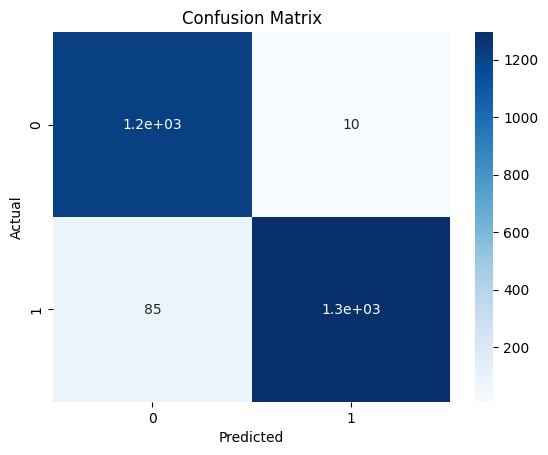

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
